# Logistic Regression

# Problem Statement

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams

# Loading and Visualizing the data

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

In [129]:
data = pd.read_csv('ex2data1.txt', header=None, names=['test1', 'test2', 'result'])
X = np.asarray(data[['test1', 'test2']])
y = np.asarray(data.result)
data.head()

,test1,test2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


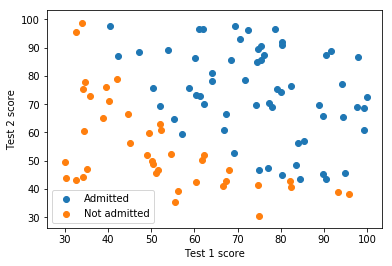

In [130]:
pos = X[np.where(y==1)]
neg = X[np.where(y==0)]
adm = plt.scatter(pos[:, 0], pos[:, 1])
nadm = plt.scatter(neg[:, 0], neg[:, 1])
plt.legend((adm, nadm),('Admitted', 'Not admitted'))
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.show()

# Sigmoid function

In [131]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Cost function

In [132]:
def costFunction(theta,X,y):
    m = len(y)
    z = sigmoid(np.dot(X, theta))
    J = (-1/m) * np.sum(np.multiply(y, np.log(z)) 
        + np.multiply((1-y), np.log(1 - z)))
    grad = ((1/m) * np.sum(X.T * (z - y), axis = 1))
    return (J, grad)

In [133]:
X = np.hstack((np.ones((len(y), 1)), X))
initial_theta = np.zeros(3)
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): \n', cost)
print('Gradient at initial theta (zeros): \n',grad)

Cost at initial theta (zeros): 
 0.6931471805599453
Gradient at initial theta (zeros): 
 [ -0.1        -12.00921659 -11.26284221]


# Minimizing cost function

In [134]:
res = minimize(costFunction, initial_theta, method='Newton-CG', args=(X,y), jac=True, 
               options={'maxiter':400, 'disp':True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 27
         Function evaluations: 72
         Gradient evaluations: 228
         Hessian evaluations: 0


In [135]:
theta = res.x
print('Cost at theta found by minimize: \n', res.fun)
print('theta: \n', theta)

Cost at theta found by minimize: 
 0.2034977046584158
theta: 
 [-25.15679341   0.2061951    0.20143518]


# Plotting Decision Boundary

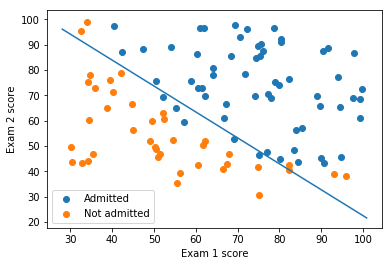

In [136]:
plot_x = [ np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta[2]*(theta[0] + np.dot(theta[1], plot_x))

mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

# Calculating accuracy

In [137]:
def accuracy(X, y, theta, threshold):
    pred = [sigmoid(np.dot(X, theta)) >= threshold]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(X, y.flatten(), theta, 0.5)

89.0


# Regularized logistic regression

# Problem Statement

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.      

# Loading and Visualizing the data

In [223]:
data = pd.read_csv('ex2data2.txt', header=None, names=['test1', 'test2', 'results'])
data.head()

,test1,test2,results
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [239]:
X = np.asarray(data[['test1', 'test2']])
y = np.asarray(data.results)

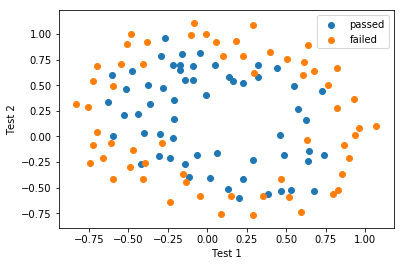

In [225]:
p = X[np.where(y==1)]
n = X[np.where(y==0)]
passed = plt.scatter(p[:, 0], p[:, 1])
npassed = plt.scatter(n[:, 0], n[:, 1])
plt.legend((passed, npassed), ('passed', 'failed'))
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.show()

# Feature Mapping

In [240]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(X1.shape)[:,np.newaxis]
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j),                                     np.power(X2, j))[:,np.newaxis]))
    return out

In [241]:
X = mapFeature(X[:,0], X[:,1])
X.shape

(118, 28)

# Cost function

In [235]:
def costFunctionReg(theta, X, y, lambda1):
    m = len(y)
    J =((np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-
       (1-y)*(np.log(1-sigmoid(np.dot(X,theta))))))/m +
       (lambda1/m)*np.sum(theta**2))
    # Non-regularized 
    grad_0 = (np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m)
    # Regularized
    grad_reg = grad_0 + (lambda1/m)*theta
    grad_reg[0] = grad_0[0] 
    
    return J

In [242]:
initial_theta = np.zeros(len(X[0,:]))
lambd = 1.0

# Optimization

In [243]:
res = minimize(costFunctionReg, initial_theta, args=(X,y,lambd), tol=1e-6,
               options={'maxiter':400, 'disp':True})

Optimization terminated successfully.
         Current function value: 0.579289
         Iterations: 43
         Function evaluations: 1320
         Gradient evaluations: 44


In [244]:
theta = res.x
print(theta)

[ 0.77034971  0.32220124  0.75694729 -1.27766149 -0.51998894 -0.78672994
  0.01745118 -0.2199584  -0.21698586 -0.15806136 -0.97636281 -0.0429444
 -0.38681358 -0.14437778 -0.79176767 -0.20258017 -0.1322021  -0.04622712
 -0.17235189 -0.16468477 -0.394173   -0.71467854  0.00546583 -0.19089848
  0.00322813 -0.21014209 -0.06757593 -0.69148855]


# Accuracy

In [245]:
pred = [sigmoid(np.dot(X, theta)) >= 0.5]
np.mean(pred == y.flatten()) * 100

82.20338983050848

# Plotting Decision Boundary

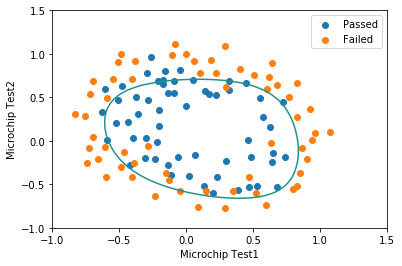

In [258]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeature(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeature(u[i], v[j]), theta)
mask = y.flatten() == 1
X = np.asarray(data[['test1', 'test2']])
p = X[np.where(y==1)]
n = X[np.where(y==0)]
passed = plt.scatter(p[:, 0], p[:, 1])
npassed = plt.scatter(n[:, 0], n[:, 1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, npassed), ('Passed', 'Failed'))
plt.show()